Introduce the idea
- give background on JBP + CN interview
- explain general media angle towards JBP
- present question of: are his followers angry evil bigots or just normal people

introduce method
- using semantic analysis tools on millions of comments across dozens of youtube videos involving his audience
- looking at sentiment polarity
- looking at moodtags

As online communities have gained traction in the 'real world', journalists have worked to understand and explain them. So far, their attempts have come up short.

The typical method is to cover an online community the same way you'd cover a mass political movement. Understandably so — both can consist of millions of people, united by some common thread and therefore all doing something together. A rally and an online community, however, are profoundly different. The rally is a simple creature: everyone attending supports some stated mission, and they show that support in a singular way — marching.

Online communities, however, present a massively more complex problem. Rather than marching as one behind the banner of a cause, online communities are decentralized and spontaneous. As a 'member' — if that label even applies — you are individual with your own voice. You attend if and when you please, engage in whichever way you see fit, and are not required to march in anyone's parade.

An online community, with all of its fractious diversity and subtle details, cannot be adequately explained by the language of political movements. A high resolution photo should not be viewed on a low resolution screen.

Nowhere has this been more evident than in the critical news coverage of Jordan Peterson's rise to international fame.

[Many]() [articles]() [have]() [categorized]() Dr. Peterson's audience as a horde of angry white men, who will 

Of course, this is applying a standard political lens to Peterson's _movement_ (if we can call it that), and building on that. Peterson's message is interpreted by the left-leaning journalist as reactionary against modern third-wave (for those of you counting at home) feminism. They then see that it attracts white men. They infer that, since it is a reactionary movement of white men, that these men are struggling back against the social gains of other classes — and are therefore angry.

Then, they see angry comments on YouTube and Twitter, and their ideological suppositions are confirmed. _Jordan Peterson is the lord of the angry white men._



Using some basic natural language processing and data analysis, I'm going to see if the comments prove (or falsify) that hypothesis. My methods are 

In [13]:
import pandas as pd
import numpy as np
from senticnet.senticnet import SenticNet
import spacy
import re, string
import math
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
from scipy import stats

sn = SenticNet()
nlp = spacy.load('en')

We're going to use Pandas and Numpy for our basic data processing and analysis, matplotlib for simple visualizations, SenticNet for our semantic analysis, and spaCy for some of its basic NLP tools.

To get started, let's pull in our datasets. We're looking at scraped comments from various YouTube videos:
- Newman interview
- All of Peterson's biblical lectures, combined into one
- The Munk debate
- The first presidential debate
- A random music video by the chainsmokers

In [2]:
# metadataframe = pd.DataFrame(columns=['Video Title', 'Path', 'JBP', 'Debate', 'Genre'])
video_list = [
    {'Video Title': 'Peterson vs Newman', 'Path': './comment-assets/newman-new.csv', 'JBP': True, 'Debate': True, 'Genre': 'Intellectual'},
    {'Video Title': 'Biblical Lectures', 'Path': './comment-assets/biblical-lectures.csv', 'JBP': True, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'Munk Debate', 'Path': './comment-assets/munk-debate.csv', 'JBP': True, 'Debate': True, 'Genre': 'Intellectual'},
    {'Video Title': 'Peterson on Rogan', 'Path': './comment-assets/peterson-rogan.csv', 'JBP': True, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'Peterson on Maher', 'Path': './comment-assets/peterson-maher.csv', 'JBP': True, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'PewDiePie Soyboys', 'Path': './comment-assets/pewdiepie-soyboys.csv', 'JBP': False, 'Debate': False, 'Genre': 'Popular'},
    {'Video Title': 'Chainsmokers Music Video', 'Path': './comment-assets/chainsmokers.csv', 'JBP': False, 'Debate': False, 'Genre': 'Popular'},
    {'Video Title': 'Clinton vs Trump Debate', 'Path': './comment-assets/clinton-trump.csv', 'JBP': False, 'Debate': True, 'Genre': 'Intellectual'},
    {'Video Title': 'Obama vs Romney Debate', 'Path': './comment-assets/obama-romney.csv', 'JBP': False, 'Debate': True, 'Genre': 'Intellectual'},
    {'Video Title': 'Hitchens vs Ramadan Debate', 'Path': './comment-assets/hitchens-ramadan.csv', 'JBP': False, 'Debate': True, 'Genre': 'Intellectual'},
    {'Video Title': 'TED Talk Sam Harris', 'Path': './comment-assets/ted-talk-harris.csv', 'JBP': False, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'TED Talk James Veitch', 'Path': './comment-assets/ted-talk-veitch.csv', 'JBP': False, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'TED Talk Cameron Russell', 'Path': './comment-assets/ted-talk-russell.csv', 'JBP': False, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'TED Talk Amy Cuddy', 'Path': './comment-assets/ted-talk-cuddy.csv', 'JBP': False, 'Debate': False, 'Genre': 'Intellectual'},
    {'Video Title': 'Makeup Under a Microscope', 'Path': './comment-assets/makeup-microscrope.csv', 'JBP': False, 'Debate': False, 'Genre': 'Popular'},
    {'Video Title': 'Metallica Music Video', 'Path': './comment-assets/metallica-nothing-else-matters.csv', 'JBP': False, 'Debate': False, 'Genre': 'Popular'},
    {'Video Title': 'Drake Music Video', 'Path': './comment-assets/drake-nice-for-what.csv', 'JBP': False, 'Debate': False, 'Genre': 'Popular'},
]
metadataframe = pd.DataFrame(video_list)

In [3]:
comments = pd.DataFrame()

for idx, video in metadataframe.iterrows():
    df = pd.read_csv(video['Path'], error_bad_lines=False)
    df['Video Title'] = video['Video Title']
    df['JBP'] = video['JBP']
    df['Debate'] = video['Debate']
    df['Genre'] = video['Genre']
    comments = comments.append(df)

b'Skipping line 675: expected 4 fields, saw 7\nSkipping line 1349: expected 4 fields, saw 7\nSkipping line 2003: expected 4 fields, saw 7\nSkipping line 3086: expected 4 fields, saw 7\nSkipping line 3512: expected 4 fields, saw 7\nSkipping line 4132: expected 4 fields, saw 7\nSkipping line 4676: expected 4 fields, saw 7\nSkipping line 5468: expected 4 fields, saw 7\nSkipping line 6616: expected 4 fields, saw 7\nSkipping line 7912: expected 4 fields, saw 7\nSkipping line 8580: expected 4 fields, saw 7\nSkipping line 9316: expected 4 fields, saw 7\nSkipping line 12769: expected 4 fields, saw 7\nSkipping line 13225: expected 4 fields, saw 7\nSkipping line 14557: expected 4 fields, saw 7\nSkipping line 15291: expected 4 fields, saw 7\n'


Next, we're going to put together some functions to perform semantic analysis on these comments. To start, we'll clean the data by removing punctuation, splitting comments into lists of individual words (tokenizing), and dropping stopwords such as "the", "this", and "and".

In [4]:
def comment_cleaner(df):
    clean_comments = []    
    punct = str.maketrans(string.punctuation,' '*len(string.punctuation))
    for idx, comment in df.iterrows():
        cleaned = str(comment['commentText']).translate(punct)
        clean_comments.append(cleaned.lower().replace('\n', ' ').replace('\r', '').split(' '))
    return pd.Series(clean_comments)

In [5]:
def remove_stopwords(column):
    for comment in column:
        comment[:] = [x for x in comment if not nlp.vocab[str(x)].is_stop]
    return column

After scrubbing out all of our unnecessary stopwords and punctuation, we can use SenticNet to get the _polarity_ of each comment. Polarity tells us whether the tone of a comment is positive or negative. Here's a brief example:

In [6]:
print('Good polarity: ', sn.polarity_intense('good'))
print('Love polarity: ', sn.polarity_intense('love'))
print('Hate polarity: ', sn.polarity_intense('hate'))
print('Evil polarity: ', sn.polarity_intense('evil'))

Good polarity:  0.849
Love polarity:  0.83
Hate polarity:  -0.83
Evil polarity:  -0.76


The function below takes a comment as a parameter and finds the polarity of each word in the comment. Then, it takes the mean of all nonzero polarities — polarities of 0.0 are typically triggered by typos or proper nouns, which we do not want to skew our average.

The complete set of comment polarity scores will allow us to see the full distribution of commenters' tones.

In [7]:
def get_polarity(comment):
    comment_polarity = []
    for word in comment:
        token_polarity = 0.0
        try:
            token_polarity = float(sn.polarity_intense(str(word)))
        except Exception as e:
            pass
        comment_polarity.append(token_polarity)
    return np.mean([item for item in comment_polarity if (item != 0)])

To get more granular than mere positive-versus-negative, we're going to use SenticNet's _moodtags_: 'admiration', 'interest', 'joy', 'surprise', 'anger', 'sadness', 'fear', and 'disgust'. Each word analyzed will generate two moodtags, and each comment will have its own list of all of the moodtags generated.

In [8]:
print('Good moodtags: ', sn.moodtags('good'))
print('Love moodtags: ', sn.moodtags('love'))
print('Hate moodtags: ', sn.moodtags('hate'))
print('Evil moodtags: ', sn.moodtags('evil'))

Good moodtags:  ['#joy', '#interest']
Love moodtags:  ['#joy', '#admiration']
Hate moodtags:  ['#anger', '#disgust']
Evil moodtags:  ['#fear', '#disgust']


In the final analysis, we will be able to use this data to visualize the prevalence of certain moods, such as anger, among Jordan Peterson's commenters compared to commenters among other YouTube populations.

The following function assigns a list of moodtags to each comment in the dataframe.

In [9]:
def get_moodtags(comment):
    comment_moods = []
    for word in comment:
        try:
            comment_moods.append(sn.moodtags(str(word)))
        except Exception as e:
            pass
    return [item.strip('#') for sublist in comment_moods for item in sublist]

In [10]:
# dataframes = [biblical_lectures, newman_interview, presidential_debate, chainsmokers_video, munk_debate]

comments['Cleaned'] = remove_stopwords(comment_cleaner(comments))
print('Comments cleaned.')
comments['Polarity'] = comments['Cleaned'].apply(get_polarity)
print('Polarities identified.')
comments['Moodtags'] = comments['Cleaned'].apply(get_moodtags)
print('Moodtags added.')
print(len(comments), 'comments processed.')

Comments cleaned.


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Polarities identified.
Moodtags added.
285759 comments processed.


Now, let's grab the specific pieces of data we're going to compare:
- Peterson's interview with Newman
- All of Peterson's debates (or combative interviews, including the one with Newman)
- The above, but sans Newman
- Peterson's lectures, to see if his audience behaves differently outside debates
- Intellectual debate videos that do not involve Peterson
- Intellectual lecture/instructional (non-debate) videos that do not involve Peterson (primarily TED talks)
- A group of popular, non-intellectual videos (music videos, PewDiePie, makeup tutorials, etc.)

In [11]:
newman_interview = comments.loc[(comments['Video Title']=='Peterson vs Newman')]
peterson_debates = comments.loc[(comments['JBP']==True) & (comments['Debate']==True)]
peterson_debates_sans_newman = comments.loc[(comments['Debate']==True) & (comments['JBP']==True) & (comments['Video Title']!='Peterson vs Newman')]
peterson_lectures = comments.loc[(comments['JBP']==True) & (comments['Debate']==False)]
intellectual_debates_sans_peterson = comments.loc[(comments['Debate']==True) & (comments['JBP']==False) & (comments['Genre']=='Intellectual')]
intellectual_sans_peterson = comments.loc[(comments['Debate']==False) & (comments['JBP']==False) & (comments['Genre']=='Intellectual')]
popular_videos = comments.loc[(comments['Genre']=='Popular')]

Everything is ready to go. Let's get started with our analysis.

Each of these comment groupings has a distribution of polarities. We're going to run the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) to check if these distributions are significantly different. 

Essentially, the KS test checks for the null hypothesis that two independent samples are drawn from the same distribution. A high KS statistic or low p-value would allow us to reject the null hypothesis.

In [51]:
print(len(peterson_debates['Polarity']))
print(len(newman_interview['Polarity']))

88357
68012


In [14]:
print(scipy.stats.ks_2samp(newman_interview['Polarity'], newman_interview['Polarity']))

Ks_2sampResult(statistic=0.0, pvalue=1.0)


If the _p-value_ here is 1.0 and the statistic is 0.0, since we're comparing a distribution to itself.

In [15]:
# Comparing Peterson's Newman interview with his other debates
print(scipy.stats.ks_2samp(newman_interview['Polarity'], peterson_debates_sans_newman['Polarity']))

# Comparing all Jordan Peterson videos to all others
print(scipy.stats.ks_2samp(comments.loc[(comments['JBP']==True)]['Polarity'], comments.loc[(comments['JBP']==False)]['Polarity']))

# Comparing all Jordan Peterson debates with other debates
print(scipy.stats.ks_2samp(intellectual_debates_sans_peterson['Polarity'], peterson_debates['Polarity']))

Ks_2sampResult(statistic=0.024620393923227013, pvalue=1.0959509974618869e-08)
Ks_2sampResult(statistic=0.0070258831176095438, pvalue=0.0021727643705626281)
Ks_2sampResult(statistic=0.016205031469083697, pvalue=1.4117673312886154e-05)


Across categories, we see significant differences in the polarity distributions — our first two p-values are well below 0.01 (note the scientific notation).

Our third attempt, by contrast, shows us a p-value very close to 1: comparing Peterson's debates to all of other debates. This is an early indication that audiences may behave differently depending on the type of video, but not necessarily as a result of the people in those videos.

The KS statistics in all cases are quite low, however, so let's visualize these distributions and grab some descriptive statistics to get a better idea of what we're working with. First up: the Cathy Newman interview.

DescribeResult(nobs=63921, minmax=(-1.0, 0.997), mean=0.13718067966865377, variance=0.12915352802933658, skewness=-0.3670520561921993, kurtosis=0.6783489304201429)


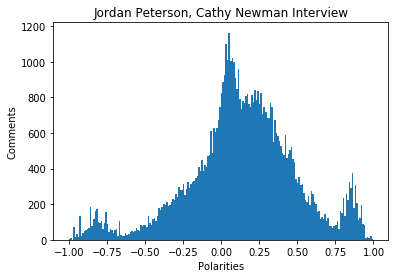

In [16]:
print(scipy.stats.describe(newman_interview['Polarity'].dropna()))
plt.hist(newman_interview['Polarity'].dropna(), bins=200,)
plt.ylabel('Comments')
plt.xlabel('Polarities')
plt.title('Jordan Peterson, Cathy Newman Interview')
plt.show()

Let's follow the breadcrumbs from our KS test and compare it to the other debates:

DescribeResult(nobs=28140, minmax=(-1.0, 0.997), mean=0.14451230377810353, variance=0.1332005837230219, skewness=-0.43432502955235475, kurtosis=0.748862642522111)


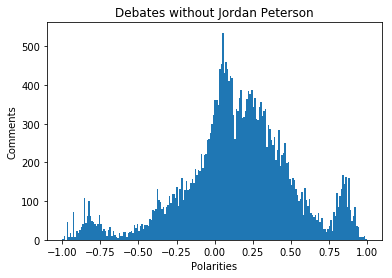

In [17]:
print(scipy.stats.describe(intellectual_debates_sans_peterson['Polarity'].dropna()))
plt.hist(intellectual_debates_sans_peterson['Polarity'].dropna(), bins=200)
plt.ylabel('Comments')
plt.xlabel('Polarities')
plt.title('Debates without Jordan Peterson')
plt.show()

Both distributions resemble a normal (Gaussian) pattern, except for the spikes at each extreme. Let's quickly check whether these distributions pass a normality test:

In [18]:
# I think I can do without this — not clear what it adds

print('Baseline: ', scipy.stats.normaltest(np.random.normal(10, 1, 10000)))
print(scipy.stats.normaltest(newman_interview['Polarity'].dropna()))
print(scipy.stats.normaltest(intellectual_debates_sans_peterson['Polarity'].dropna()))

Baseline:  NormaltestResult(statistic=1.1307532187240086, pvalue=0.56814613730679242)
NormaltestResult(statistic=2048.7659283512185, pvalue=0.0)
NormaltestResult(statistic=1171.3129222566422, pvalue=4.4939748848900402e-255)


They do not. Intuitively, this makes some sense — debates are deliberately polarizing, so some stacking at the poles would be expected. Perhaps there's a link between controversy and strong polarity bumps near -1 and +1.

To test this, let's examine intellectual videos that aren't debates:

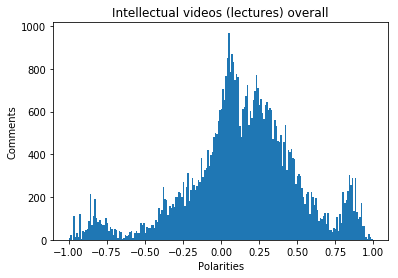

In [19]:
plt.hist(comments.loc[(comments['Genre']=='Intellectual') & (comments['Debate']==False)]['Polarity'].dropna(), bins=200,)
plt.ylabel('Comments')
plt.xlabel('Polarities')
plt.title('Intellectual videos (lectures) overall')
plt.show()

Interestingly, these look about the same as the debates. (Note that this doesn't seem to differ among Peterson's lecture audiences and other lecture audiences, e.g., TED talks.)

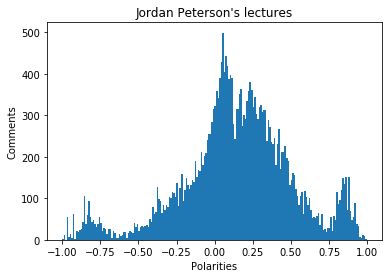

In [20]:
plt.hist(peterson_lectures['Polarity'].dropna(), bins=200)
plt.ylabel('Comments')
plt.xlabel('Polarities')
plt.title("Jordan Peterson's lectures")
plt.show()

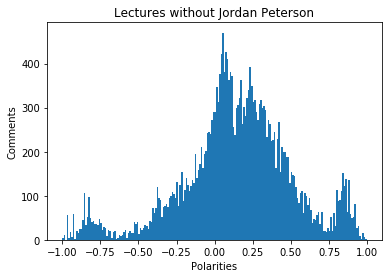

In [224]:
plt.hist(intellectual_sans_peterson['Polarity'].dropna(), bins=200)
plt.ylabel('Comments')
plt.xlabel('Polarities')
plt.title('Lectures without Jordan Peterson')
plt.show()

Again, we're seeing the same distribution — independent of audience — among intellectual videos. Perhaps this is a genre-specific pattern.

To test that, let's take a look at the polarity distribution among popular videos, such as music videos, makeup tutorials, and gaming channels.

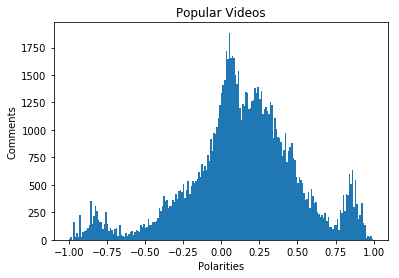

In [21]:
plt.hist(popular_videos['Polarity'].dropna(), bins=200)
plt.ylabel('Comments')
plt.xlabel('Polarities')
plt.title('Popular Videos')
plt.show()

Again, roughly the same distribution. As we move outwards from Jordan Peterson's interview with Cathy Newman — first to his other debates, then to all intellectual debates, then to all intellectual videos, then to popular videos more broadly — we find that YouTube commenter tone tends to follow the above pattern, _independently of the video's content or the people in it_.

Now that we've established no tonal abnormalities among Peterson's audience (whether they're watching him argue with Cathy Newman or lecture on the Psychological Significance of the Biblical Stories), let's look at commenters' moods.

Moodtags allow us to take a more granular approach, by examining the two moodtags for each token (real word) in every comment.

In [22]:
# Setting up our pie charts for visual consistency
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1)
labels = ['admiration', 'interest', 'joy', 'surprise', 'anger', 'sadness', 'fear', 'disgust']

# Creating a Counter object to tabulate each moodtag in a given dataframe
def count_moodtags(df):
    word_string = ''
    word_list = [item for sublist in df['Moodtags'] for item in sublist]
    word_string += ', '.join(word_list)
    return Counter(word_list)

As we begin, remember that we're specifically keeping an eye out for the _negative_ moodtags of anger, fear, and disgust. An overrepresentation of these (especially anger) among Jordan Peterson's audience would support the notion that they are particularly hateful and toxic.

To begin, let's look at the Cathy Newman interview.

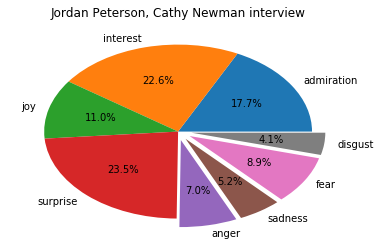

In [23]:
plt.pie(count_moodtags(newman_interview).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Jordan Peterson, Cathy Newman interview')
plt.show()

Just over a quarter of the tokens have negative moods, with a mere 7% expressing anger. Things are not looking good for the 'angry Peterson fanboy' model.

Let's move outwards, to Peterson's debates more broadly:

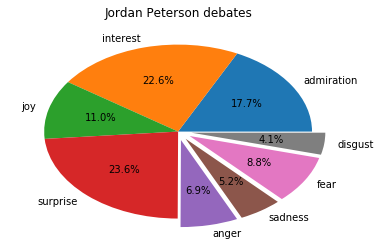

In [24]:
plt.pie(count_moodtags(peterson_debates).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Jordan Peterson debates')
plt.show()

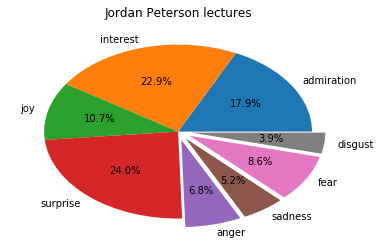

In [25]:
plt.pie(count_moodtags(peterson_lectures).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Jordan Peterson lectures')
plt.show()

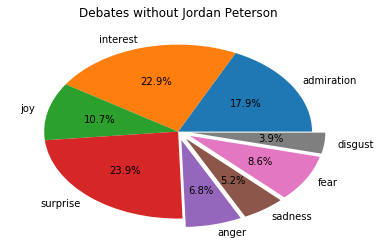

In [26]:
plt.pie(count_moodtags(intellectual_debates_sans_peterson).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Debates without Jordan Peterson')
plt.show()

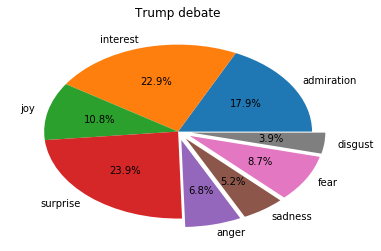

In [29]:
plt.pie(count_moodtags(comments.loc[(comments['Video Title']=='Clinton vs Trump Debate')]).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Trump debate')
plt.show()

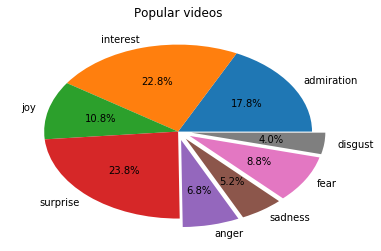

In [27]:
plt.pie(count_moodtags(popular_videos).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Popular videos')
plt.show()

In [394]:
sample1 = np.random.randn(10, 1)
sample2 = 1 + np.random.randn(15, 1)
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
print(t_stat)
print(p_val)
type(sample1)

[-4.56931564]
[ 0.00015386]


numpy.ndarray

In [347]:
def count_moodtags(df):
    word_string = ''
    word_list = [item for sublist in df['Moodtags'] for item in sublist]
    word_string += ', '.join(word_list)
    return Counter(word_list)

newman_moods = count_moodtags(newman_interview)
lecture_moods = count_moodtags(biblical_lectures)
president_moods = count_moodtags(presidential_debate)
chainsmoker_moods = count_moodtags(chainsmokers_video)

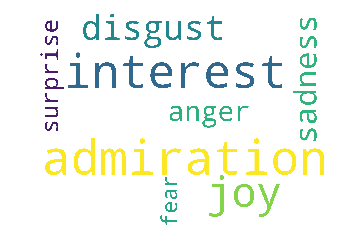

In [315]:
wordcloud = WordCloud(background_color='white',
                          width=4000,
                          height=3000
                         ).generate_from_frequencies(debate_moods)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

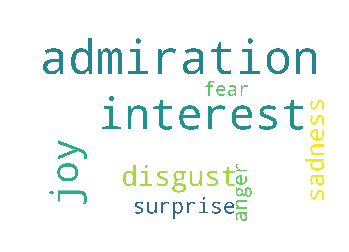

In [316]:
wordcloud = WordCloud(background_color='white',
                          width=4000,
                          height=3000
                         ).generate_from_frequencies(lecture_moods)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

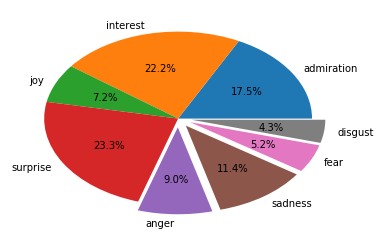

In [359]:
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1)
labels = ['admiration', 'interest', 'joy', 'surprise', 'anger', 'sadness', 'fear', 'disgust']

plt.pie(debate_moods.values(), labels=labels, autopct='%1.1f%%', explode=explode)

plt.show()

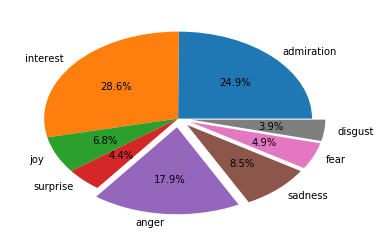

In [356]:
plt.pie(lecture_moods.values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()

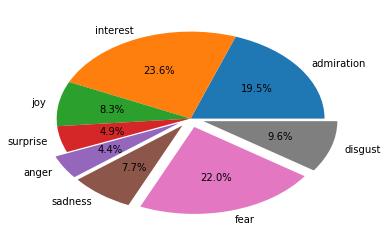

In [357]:
plt.pie(president_moods.values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()

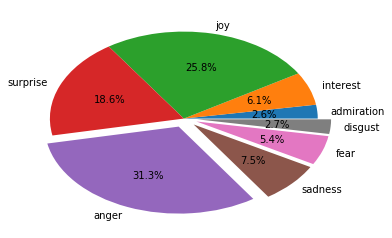

In [358]:
plt.pie(chainsmoker_moods.values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()

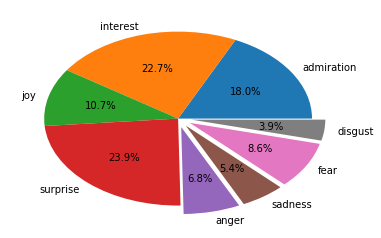

In [39]:
plt.pie(count_moodtags(comments.loc[(comments['Video Title']=='Chainsmokers Music Video')]).values(), labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()

In [48]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

test = count_moodtags(comments.loc[(comments['Video Title']=='Chainsmokers Music Video')])
test2 = count_moodtags(comments.loc[(comments['Video Title']=='Peterson vs Newman')])

print(test['admiration']/test['interest'])
print(test2['admiration']/test2['interest'])

1.0563069035622734
1.0431981364996554


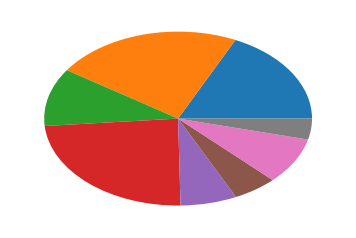

In [44]:
plt.pie(count_moodtags(comments.loc[(comments['Video Title']=='Chainsmokers Music Video')]).values())
plt.show()